In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as Fn
import math
import torch
import scipy.special
from numbers import Number
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data, labels = pd.read_csv('https://raw.githubusercontent.com/kimmyjuarez/seniorproject/main/data_matrix_fixed.csv', header=None), pd.read_csv('https://raw.githubusercontent.com/kimmyjuarez/seniorproject/main/labels_fixed.csv', header=None)
!wget https://github.com/kimmyjuarez/seniorproject/raw/main/unlabeled_matrix.zip
!unzip unlabeled_matrix.zip
test_data = pd.read_csv('unlabeled_matrix.csv', header=None)
test_data_tensor = torch.tensor(test_data.values).float()

train_data = pd.DataFrame(data).values
train_data = torch.tensor(train_data).float()
train_data = train_data.unsqueeze(-1)
train_label = pd.DataFrame(labels).values.flatten()
train_label = torch.tensor(train_label).long()

#print(train_data)
#print(train_label)
print(train_data.shape)
print(train_label.shape)
# data.head()
# labels.head()
test_data_tensor = test_data_tensor.unsqueeze(2)
test_data_tensor.shape

--2023-12-11 16:58:32--  https://github.com/kimmyjuarez/seniorproject/raw/main/unlabeled_matrix.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kimmyjuarez/seniorproject/main/unlabeled_matrix.zip [following]
--2023-12-11 16:58:33--  https://raw.githubusercontent.com/kimmyjuarez/seniorproject/main/unlabeled_matrix.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2411566 (2.3M) [application/zip]
Saving to: ‘unlabeled_matrix.zip’

unlabeled_matrix.zi 100%[===================>]   2.30M  --.-KB/s    in 0.05s   

2023-12-11 16:58:33 (47.7 MB/s) - ‘unlabeled_matrix.zip’ saved [2411566/2411566]



torch.Size([199816, 338, 1])

In [ ]:
train_data

tensor([[[ 23.],
         [ 24.],
         [  8.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 10.],
         [ 10.],
         [  4.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 16.],
         [  4.],
         [182.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        ...,

        [[120.],
         [109.],
         [109.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 37.],
         [ 33.],
         [ 33.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 80.],
         [202.],
         [202.],
         ...,
         [  0.],
         [  0.],
         [  0.]]])

In [ ]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [ ]:
#@title Default title text
#Backbone Network:
import torch
import os
import pandas as pd
from skimage import io, transform
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils,models
import numpy as np
import pandas as pd
import shutil, time, os, requests, random, copy
from itertools import permutations
import seaborn as sns

import math

import imageio
from skimage.transform import rotate, AffineTransform, warp, resize
#import skvideo.io as vidio
#from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image, SVG
import h5py
#from tabulate import tabulate

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

try:
    from torch.hub import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url

from typing import Type, Any, Callable, Union, List, Optional
from torch import Tensor
from collections import OrderedDict


import torch
from torch import Tensor
import torch.nn as nn
from torch.hub import load_state_dict_from_url
#from torch.utils import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Optional
import torch.nn.functional as F

__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-f37072fd.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-b627a593.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-0676ba61.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-63fe2227.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-394f9c45.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv1d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv1d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet2D1(nn.Module):

    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 20,
        zero_init_residual: bool = False,
        groups: int = 1,
        input_size: int = 9,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(ResNet2D1, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv1d(input_size, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=4,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=8,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(512 * block.expansion, 256)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm1d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]


        self.hash_fc = nn.Sequential(
            nn.Linear(256, 64, bias=False),
            nn.BatchNorm1d(64, momentum=0.1)
        )
        self.fcn = nn.Linear(64, num_classes);
        nn.init.normal_(self.hash_fc[0].weight, std=0.01)
        # nn.init.zeros_(self.hash_fc.bias)


    def _make_layer(self, block: Type[Union[BasicBlock, Bottleneck]], planes: int, blocks: int,
                    stride: int = 1, dilate: bool = False) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        #print(x.size())
        #x = x.mean(dim=2)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        x = self.fc(x)
        x = F.relu(x)
        x = self.hash_fc(x)
        o = self.fcn(x)
        o = F.softmax(o,dim=1)
        return o, x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _resnet(
    arch: str,
    block: Type[Union[BasicBlock, Bottleneck]],
    layers: List[int],
    pretrained: bool,
    progress: bool,
    **kwargs: Any
) -> ResNet2D1:
    model = ResNet2D1(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)

def resnet50(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)

def resnet152(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)

def resnet34(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)

def resnet101(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)

def resnext50_32x4d(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_.
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet2D1:
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_.
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)

#HashNet Function

In [ ]:
import torch
class HashNetLoss(torch.nn.Module):
    def __init__(self):
        super(HashNetLoss, self).__init__()
        self.scale = 1

    def forward(self, u, y, sigmoid_alpha):
        u = torch.tanh(self.scale * u)
        y = y.float()
        S = (y @ y.t() > 0).float()

        dot_product = sigmoid_alpha * u @ u.t()
        mask_positive = S > 0
        mask_negative = (1 - S).bool()

        neg_log_probe = dot_product + torch.log(1 + torch.exp(-dot_product)) -  S * dot_product
        S1 = torch.sum(mask_positive.float())
        S0 = torch.sum(mask_negative.float())
        S = S0 + S1

        neg_log_probe[mask_positive] = neg_log_probe[mask_positive] * S / S1
        neg_log_probe[mask_negative] = neg_log_probe[mask_negative] * S / S0

        loss = torch.sum(neg_log_probe) / S
        return loss

In [ ]:
loss_hashnet=HashNetLoss()
label_onehot = torch.nn.functional.one_hot(torch.tensor(train_label).long())
model_resnet = resnet34()
model_resnet.conv1 = torch.nn.Conv1d(338, 64, kernel_size=7, stride=2, padding=3, bias=False)
label_onehot = torch.nn.functional.one_hot(torch.tensor(train_label).long())
pred, embedding = model_resnet(torch.tensor(train_data).float())

<ipython-input-7-4dd340d4e903>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_onehot = torch.nn.functional.one_hot(torch.tensor(train_label).long())
<ipython-input-7-4dd340d4e903>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_onehot = torch.nn.functional.one_hot(torch.tensor(train_label).long())
<ipython-input-7-4dd340d4e903>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred, embedding = model_resnet(torch.tensor(train_data).float())


In [ ]:
loss_hashnet(embedding,label_onehot,sigmoid_alpha=0.5) #Just to check if it works, not neccesary to run
S = (label_onehot @ label_onehot.t() > 0).float()

In [ ]:
S

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 1., 1.],
        [0., 0., 1.,  ..., 0., 1., 1.]])

#Training with Validation Loss

In [ ]:
test_data_tensor

tensor([[[  8.],
         [  8.],
         [168.],
         ...,
         [  1.],
         [  1.],
         [  1.]],

        [[  8.],
         [168.],
         [168.],
         ...,
         [  1.],
         [  1.],
         [  1.]],

        [[168.],
         [168.],
         [ 68.],
         ...,
         [  1.],
         [  1.],
         [  1.]],

        ...,

        [[  1.],
         [  1.],
         [  1.],
         ...,
         [  1.],
         [  1.],
         [  1.]],

        [[  1.],
         [  1.],
         [  1.],
         ...,
         [  1.],
         [  1.],
         [ 15.]],

        [[  1.],
         [  1.],
         [  1.],
         ...,
         [  1.],
         [ 15.],
         [ 32.]]])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_data = torch.tensor(train_data).float().clone().detach().to(device)

<ipython-input-13-9e3ab56baf5b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data).float().clone().detach().to(device)


In [ ]:
train_data

tensor([[[ 23.],
         [ 24.],
         [  8.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 10.],
         [ 10.],
         [  4.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 16.],
         [  4.],
         [182.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        ...,

        [[120.],
         [109.],
         [109.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 37.],
         [ 33.],
         [ 33.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[ 80.],
         [202.],
         [202.],
         ...,
         [  0.],
         [  0.],
         [  0.]]])

In [ ]:
import torch.optim as optim


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_resnet = resnet34()
model_resnet.conv1 = torch.nn.Conv1d(338, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Move model to the device
model_resnet = model_resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=1e-3)

# Create one-hot labels and move them to device
label_onehot = torch.nn.functional.one_hot(torch.tensor(train_label).long()).to(device)

# Move data and labels to the device
train_label = torch.tensor(train_label).long().clone().detach().to(device)
train_data = torch.tensor(train_data).float().clone().detach().to(device)

assert len(train_data) == len(label_onehot), "Mismatched lengths"


# Splitting data 60/40
split = int(0.6 * len(train_data))
training_data, val_data = train_data[:split], train_data[split:]
training_label_onehot, val_label_onehot = label_onehot[:split], label_onehot[split:]

# Initialize lists for storing embeddings and labels
embedding_list_train = []
embedding_list_val = []

best_loss = float('inf')

#print(train_data.shape)
#print(label_onehot.shape)
#print(training_data.shape)
#print(training_label_onehot.shape)

# Training loop
for i in range(1000):
    optimizer.zero_grad()

    # Training Data
    pred, embedding = model_resnet(torch.tensor(training_data).float())
    #print(embedding.shape)
    #print(training_label_onehot.shape)

    tmp = embedding / embedding.norm(dim=1).unsqueeze(dim=1)
    train_loss = loss_hashnet(embedding, training_label_onehot, sigmoid_alpha=0.5)

    embedding_list_train.append(tmp.cpu().detach().numpy())

    train_loss.backward()
    optimizer.step()
    print("Epoch:", i+1, 'Training loss: ' + str(train_loss.item()))

    # Validation Data
    with torch.no_grad():
        pred_val, embedding_val = model_resnet(val_data.float())
        tmp_val = embedding_val / embedding_val.norm(dim=1).unsqueeze(dim=1)
        val_loss = loss_hashnet(embedding_val, val_label_onehot, sigmoid_alpha=0.5)

        embedding_list_val.append(tmp_val.cpu().detach().numpy())

    # Save the best model based on validation loss
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        torch.save(model_resnet.state_dict(), '/content/drive/MyDrive/Senior_Project/best_hashnet_model.pth')
        print("New best val loss:", best_loss, "at epoch", i+1)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(embedding_list, labels, title, is_hash=False):
    # If is_hash is True, apply some hash-specific logic (if any)

    # Choose one epoch's embeddings or average them, based on what you find useful
    # For example, using the last epoch's embeddings
    final_embedding = embedding_list[-1].reshape(-1, embedding_list[-1].shape[-1])

    # Initialize t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

    # Perform t-SNE on embeddings
    tsne_results = tsne.fit_transform(final_embedding)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels.cpu().numpy().argmax(axis=1), cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.show()


[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.001s...
[t-SNE] Computed neighbors for 96 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 0.926776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.371025
[t-SNE] KL divergence after 300 iterations: 0.022360


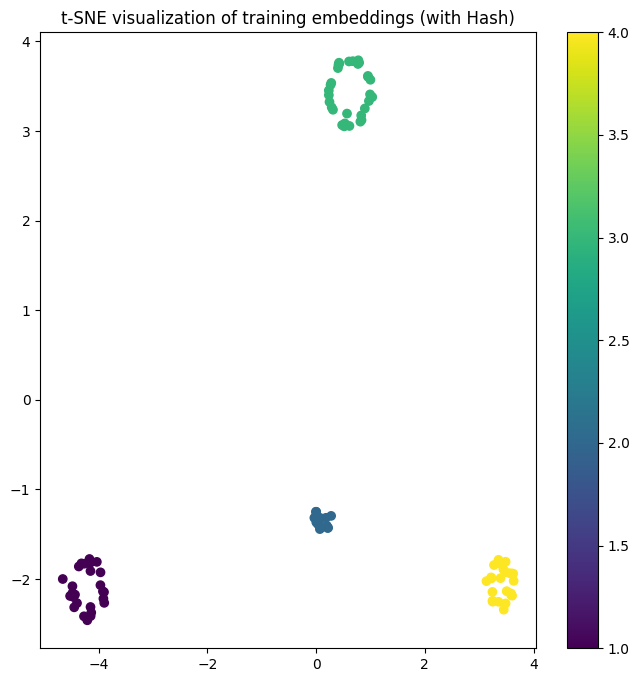

[t-SNE] Computing 64 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.008s...
[t-SNE] Computed neighbors for 65 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 1.086905
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.593510
[t-SNE] KL divergence after 300 iterations: 0.034270


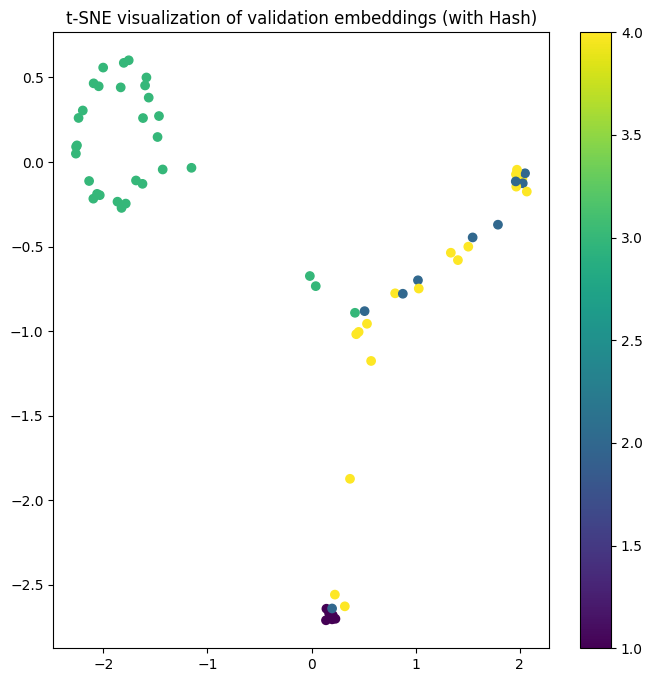

In [ ]:
plot_tsne(embedding_list_train, training_label_onehot, 't-SNE visualization of training embeddings (with Hash)', is_hash=True)
plot_tsne(embedding_list_val, val_label_onehot, 't-SNE visualization of validation embeddings (with Hash)', is_hash=True)

[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 0.926776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.507538
[t-SNE] KL divergence after 300 iterations: 0.036327


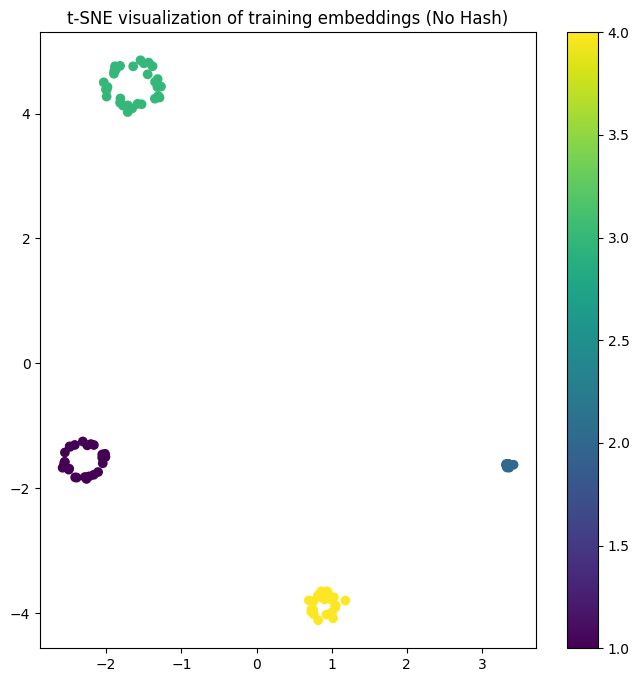

[t-SNE] Computing 64 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.003s...
[t-SNE] Computed neighbors for 65 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 1.086905
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.421482
[t-SNE] KL divergence after 300 iterations: 0.035692


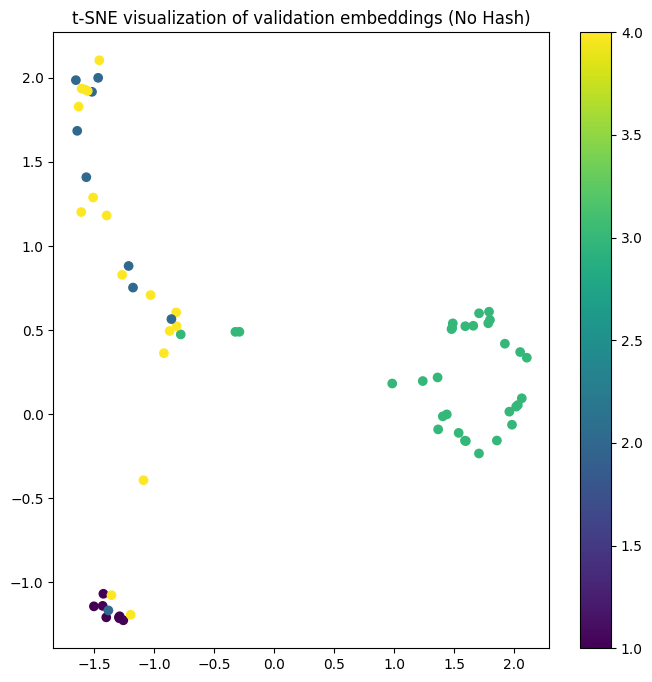

In [ ]:
plot_tsne(embedding_list_train, training_label_onehot, 't-SNE visualization of training embeddings (No Hash)', is_hash=False)
plot_tsne(embedding_list_val, val_label_onehot, 't-SNE visualization of validation embeddings (No Hash)', is_hash=False)

#mAP

In [ ]:
#db_codes = test_codes[idx,:]
#test_codes2 = test_codes[~idx,:]

import logging

import numpy as np
import torch

def tensor_to_dataset(tensor, transform=None):
    class TransformTensorDataset(Dataset):
        def __init__(self, tensor, ts=None):
            super(TransformTensorDataset, self).__init__()
            self.tensor = tensor
            self.ts = ts

        def __getitem__(self, index):
            if self.ts is not None:
                return self.ts(self.tensor[index])
            return self.tensor[index]

        def __len__(self):
            return len(self.tensor)

    ttd = TransformTensorDataset(tensor, transform)
    return ttd

class Timer(object):
    def __init__(self):
        self.start = 0
        self.end = 0
        self.total = 0

    def tick(self):
        self.start = time.time()
        return self.start

    def toc(self):
        self.end = time.time()
        self.total = self.end - self.start
        return self.end

    def print_time(self, title):
        print(f'{title} time: {self.total:.4f}s')


def get_hamm_dist(codes, centroids, margin=0, normalize=False):
    with torch.no_grad():
        nbit = centroids.size(1)
        dist = 0.5 * (nbit - torch.matmul(codes.sign(), centroids.sign().t()))

        if normalize:
            dist = dist / nbit

        if margin == 0:
            return dist
        else:
            codes_clone = codes.clone()
            codes_clone[codes_clone.abs() < margin] = 0
            dist_margin = 0.5 * (nbit - torch.matmul(codes_clone.sign(), centroids.sign().t()))
            if normalize:
                dist_margin = dist_margin / nbit
            return dist, dist_margin


def get_codes_and_labels(model, loader):
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

    vs = []
    ts = []
    for e, (d, t) in enumerate(loader):
        print(f'[{e + 1}/{len(loader)}]', end='\r')
        with torch.no_grad():
            # model forward
            d, t = d.to(device), t.to(device)
            v = model(d)
            if isinstance(v, tuple):
                v = v[0]

            vs.append(v)
            ts.append(t)

    print()
    vs = torch.cat(vs)
    ts = torch.cat(ts)
    return vs, ts

def dataloader(d, bs=256, shuffle=True, workers=-1, drop_last=True):
    if workers < 0:
        workers = 16
    l = DataLoader(d,
                   bs,
                   shuffle,
                   drop_last=drop_last,
                   num_workers=workers)
    return l

'''
def calculate_mAP(db_codes, db_labels,
                  test_codes, test_labels,
                  R, threshold=0.):
    # clone in case changing value of the original codes
    db_codes = db_codes.clone()
    test_codes = test_codes.clone()

    # if value within margin, set to 0
    if threshold != 0:
        db_codes[db_codes.abs() < threshold] = 0
        test_codes[test_codes.abs() < threshold] = 0

    # binarized
    db_codes = torch.sign(db_codes)  # (ndb, nbit)
    test_codes = torch.sign(test_codes)  # (nq, nbit)

    db_labels = db_labels.cpu().numpy() #
    test_labels = test_labels.cpu().numpy()

    dist = []
    nbit = db_codes.size(1)

    timer = Timer()
    total_timer = Timer()

    timer.tick()
    total_timer.tick()

    with torch.no_grad(): #No need to compute gradients, just sort and count data
        db_codes_ttd = tensor_to_dataset(db_codes)
        db_codes_loader = dataloader(db_codes_ttd, 32, False, 0, False) #Data will be loaded in batches of 32

        # calculate hamming distance
        for i, db_code in enumerate(db_codes_loader):
            dist.append(0.5 * (nbit - torch.matmul(test_codes, db_code.t())).cpu()) #Compares test_codes and db_code and evaluates how diff. they are then appends it to dist
            timer.toc() #How long it takes to compare each
            print(f'Distance [{i + 1}/{len(db_codes_loader)}] ({timer.total:.2f}s)', end='\r')

        dist = torch.cat(dist, 1)  # .numpy()
        print()

    # fast sort
    timer.tick()
    # different sorting will have affect on mAP score! because the order with same hamming distance might be diff.
    # unsorted_ids = np.argpartition(dist, R - 1)[:, :R]

    # torch sorting is quite fast, pytorch ftw!!!
    topk_ids = torch.topk(dist, R, dim=1, largest=False)[1].cpu()
    timer.toc()
    print(f'Sorting ({timer.total:.2f}s)')

    # calculate mAP
    timer.tick()
    APx = []
    for i in range(dist.shape[0]):

        label = test_labels[i]
        label[label == 0] = -1
        idx = topk_ids[i, :]
        # idx = idx[np.argsort(dist[i, :][idx])]
        imatch = np.sum(np.equal(db_labels[idx[0: R], :], label), 1) > 0
        rel = np.sum(imatch)
        Lx = np.cumsum(imatch)
        Px = Lx.astype(float) / np.arange(1, R + 1, 1)
        if rel != 0:
            APx.append(np.sum(Px * imatch) / rel)
        else:  # didn't retrieve anything relevant
            APx.append(0)
        timer.toc()
        print(f'Query [{i + 1}/{dist.shape[0]}] ({timer.total:.2f}s)', end='\r')

    print()
    total_timer.toc()
    logging.info(f'Total time usage for calculating mAP: {total_timer.total:.2f}s')

    return np.mean(np.array(APx))
'''

def calculate_mAP(db_codes, db_labels,
                  test_codes, test_labels,
                  R, threshold=0.):
    # clone in case changing value of the original codes
    db_codes = db_codes.clone()
    test_codes = test_codes.clone()

    # if value within margin, set to 0
    if threshold != 0:
        db_codes[db_codes.abs() < threshold] = 0
        test_codes[test_codes.abs() < threshold] = 0

    # binarized
    db_codes = torch.sign(db_codes)  # (ndb, nbit)
    test_codes = torch.sign(test_codes)  # (nq, nbit)

    print(db_codes)
    print(test_codes)
    db_labels = db_labels.cpu().numpy() #
    test_labels = test_labels.cpu().numpy()

    dist = []
    nbit = db_codes.size(1)

    timer = Timer()
    total_timer = Timer()

    timer.tick()
    total_timer.tick()

    with torch.no_grad(): #No need to compute gradients, just sort and count data
        db_codes_ttd = tensor_to_dataset(db_codes)
        db_codes_loader = dataloader(db_codes_ttd, 32, False, 0, False) #Data will be loaded in batches of 32

        # calculate hamming distance
        for i, db_code in enumerate(db_codes_loader):
            dist.append(0.5 * (nbit - torch.matmul(test_codes, db_code.t())).cpu()) #Compares test_codes and db_code and evaluates how diff. they are then appends it to dist
            timer.toc() #How long it takes to compare each
            print(f'Distance [{i + 1}/{len(db_codes_loader)}] ({timer.total:.2f}s)', end='\r')

        dist = torch.cat(dist, 1)  # .numpy()
        print()

    # fast sort
    timer.tick()
    # different sorting will have affect on mAP score! because the order with same hamming distance might be diff.
    # unsorted_ids = np.argpartition(dist, R - 1)[:, :R]

    # torch sorting is quite fast, pytorch ftw!!!
    topk_ids = torch.topk(dist, R, dim=1, largest=False)[1].cpu()
    timer.toc()
    print(f'Sorting ({timer.total:.2f}s)')

    # calculate mAP
    timer.tick()
    APx = []
    for i in range(dist.shape[0]):
        label = test_labels[i, :]
        label[label == 0] = -1
        idx = topk_ids[i, :]
        # idx = idx[np.argsort(dist[i, :][idx])]
        imatch = np.sum(np.equal(db_labels[idx[0: R], :], label), 1) > 0
        rel = np.sum(imatch)
        Lx = np.cumsum(imatch)
        Px = Lx.astype(float) / np.arange(1, R + 1, 1)
        if rel != 0:
            APx.append(np.sum(Px * imatch) / rel)
        else:  # didn't retrieve anything relevant
            APx.append(0)
        timer.toc()
        print(f'Query [{i + 1}/{dist.shape[0]}] ({timer.total:.2f}s)', end='\r')

    print()
    total_timer.toc()
    logging.info(f'Total time usage for calculating mAP: {total_timer.total:.2f}s')
    return np.mean(np.array(APx)),dist

def sign_dist(inputs, centroids, margin=0):
    n, b1 = inputs.size()
    nclass, b2 = centroids.size()

    assert b1 == b2, 'inputs and centroids must have same number of bit'

    # sl = relu(margin - x*y)
    out = inputs.view(n, 1, b1) * centroids.sign().view(1, nclass, b1)
    out = torch.relu(margin - out)  # (n, nclass, nbit)

    return out


def calculate_similarity_matrix(centroids):
    nclass = centroids.size(0)
    sim = torch.zeros(nclass, nclass, device=centroids.device)

    for rc in range(nclass):
        for cc in range(nclass):
            sim[rc, cc] = (centroids[rc] == centroids[cc]).float().mean()

    return sim


def first_ten_labels_data(input_data, input_label):
    #input_data: tensor of N x M
    #input_label: tensor of N x 1
    #
    #Convert input_data to the revised data
    #data_revised: tensor of N' x M
    #label_revised: tensor of N' x1 , each one is the class label
    input_label = input_label.reshape(-1)
    #transform input_label to tensor
    input_label = torch.tensor(input_label)

    #create a mask for labels lower than 10
    mask = input_label < 10

    #apply mask to labels and data
    label_revised = input_label[mask]
    data_revised = input_data[mask]

    #inputs = test_outt[1]
    #inputs[label_revised,:]
    label_revised = label_revised.reshape([-1,1])
    return data_revised, label_revised

from pandas._libs.lib import map_infer
#Change these into a function


#model_resnet.load_state_dict(torch.load('./drive/MyDrive/resnet_model_orthohashloss_300epoch_1024batch_validation.pth')) Don't load anything atm

import torch
import numpy as np

def compute_mAP_with_testdb(test_hashcode, test_labels,R=10):
    #test_hashcode: tensor of N x M
    #test_label: tensor of N x 1
    #
    #mAP

    idx = torch.randn((test_hashcode.shape[0]))>0
    test_labels = test_labels.reshape(-1)  # removing the second dimension
    test_labels = torch.nn.functional.one_hot(torch.tensor(test_labels).long(), num_classes=20).numpy()

    db_codes = test_hashcode[idx,:]
    test_codes = test_hashcode[~idx,:]
    db_labels = test_labels[idx,:]
    test_labels = test_labels[~idx,:]


    print(db_codes.shape)
    print(db_labels.shape)
    print(test_codes.shape)
    print(test_labels.shape)

    dist = []
    nbit = db_codes.size(1)

    mAP = calculate_mAP(db_codes, torch.tensor(db_labels), test_codes, torch.tensor(test_labels),R=10)
    return mAP

def compute_mAP_from_model(model, test_data, test_labels,R=10):
    #model: a deep learning model
    #test_data: the testing time series data of N x T x M
    #test_labels: the label N x 1
    #R: top R candidate for mAP

    #return mAP
    #out = model(torch.tensor(test_data).transpose(1,2).float())
    #test_hashcode = out[1]
    pred, embedding = model_resnet(test_data.float())
    test_hashcode = embedding/embedding.norm(dim=1).unsqueeze(dim=1)

    return compute_mAP_with_testdb(test_hashcode, test_labels,R)

#out = model_resnet(torch.tensor(test_data).transpose(1,2).float())
#inputs = out[1]


#test_hashcode_new, test_label_new = first_ten_labels_data(inputs, test_label)

#compute_mAP_with_testdb(test_hashcode_new, test_label, R=2)


In [ ]:
mAP = compute_mAP_from_model(model_resnet.cpu(), train_data.cpu() , train_label.cpu(),R=10)

torch.Size([77, 64])
(77, 20)
torch.Size([84, 64])
(84, 20)
tensor([[ 1., -1.,  1.,  ..., -1.,  1.,  1.],
        [-1.,  1., -1.,  ..., -1., -1., -1.],
        [ 1., -1., -1.,  ...,  1., -1., -1.],
        ...,
        [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [-1.,  1., -1.,  ..., -1., -1., -1.],
        [ 1., -1., -1.,  ...,  1., -1., -1.]], grad_fn=<SignBackward0>)
tensor([[-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [-1.,  1., -1.,  ..., -1., -1., -1.],
        ...,
        [ 1., -1., -1.,  ...,  1., -1., -1.],
        [ 1., -1., -1.,  ...,  1., -1., -1.],
        [ 1., -1., -1.,  ...,  1., -1., -1.]], grad_fn=<SignBackward0>)
Distance [3/3] (0.01s)
Sorting (0.00s)
Query [84/84] (0.05s)


<ipython-input-13-1a0f0b4e3b06>:320: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.nn.functional.one_hot(torch.tensor(test_labels).long(), num_classes=20).numpy()


In [ ]:
mAP

(0.8936081922848503,
 tensor([[44., 42., 43.,  ...,  1., 39., 43.],
         [43., 41., 44.,  ...,  0., 40., 44.],
         [42.,  0., 43.,  ..., 41.,  3., 43.],
         ...,
         [41., 43.,  0.,  ..., 44., 44.,  0.],
         [41., 43.,  0.,  ..., 44., 44.,  0.],
         [41., 43.,  0.,  ..., 44., 44.,  0.]]))

In [ ]:
model_resnet = resnet34()  # initialize the model
model_resnet.conv1 = torch.nn.Conv1d(338, 64, kernel_size=7, stride=2, padding=3, bias=False)  # adjust the first layer according to your data
model_resnet.load_state_dict(torch.load('/content/drive/MyDrive/Senior_Project/best_hashnet_model.pth'))

test_data_tensor = test_data_tensor.float()  # adjust the tensor and move to device

model_resnet.eval()  # set the model to evaluation mode
with torch.no_grad():  # turn off gradient computation
    pred_test, embedding_test = model_resnet(train_data)

In [ ]:
embedding_test.sign() # Not binary code

tensor([[-1.,  1.,  1.,  ...,  1., -1.,  1.],
        [-1., -1., -1.,  ...,  1., -1.,  1.],
        [ 1., -1., -1.,  ...,  1., -1.,  1.],
        ...,
        [-1., -1., -1.,  ...,  1., -1.,  1.],
        [ 1., -1., -1.,  ...,  1., -1.,  1.],
        [ 1., -1., -1.,  ...,  1., -1.,  1.]])

In [ ]:
embedding_test.shape

torch.Size([161, 64])

In [ ]:
embedding_numpy = embedding_test.sign().cpu().numpy()

# Set NumPy print options
#np.set_printoptions(threshold=np.inf)

# Print the entire NumPy array
#print(embedding_numpy)

In [ ]:
embedding_numpy.shape


(161, 64)

In [ ]:
temp_embedding_numpy = (embedding_numpy + 1)/2

In [ ]:
# Given embedding_test.sign() Decimal Value = (binary digit) * 2^(position) For Loop

In [ ]:
embedding_decimal_value = []

for i in range(temp_embedding_numpy.shape[0]):
    decimal_value = 0
    for j in range(temp_embedding_numpy.shape[1]):
        decimal_value += temp_embedding_numpy[i][j] * 2**j
    embedding_decimal_value.append(decimal_value)

In [ ]:
embedding_decimal_value

[1.3661598262856577e+19,
 1.245006488498159e+19,
 1.2415720819075086e+19,
 1.2450060486935079e+19,
 1.2415720819075086e+19,
 1.358497419090752e+19,
 1.2415720819075086e+19,
 1.245006488498159e+19,
 1.2415720819075086e+19,
 1.3584971990810522e+19,
 1.2415720819075086e+19,
 1.3085137510553154e+19,
 1.245006488498159e+19,
 1.2415720819075086e+19,
 1.3584974259694105e+19,
 1.2415720819075086e+19,
 1.3584974259656094e+19,
 1.2415720819075086e+19,
 1.8273284281283965e+19,
 1.2415720819075086e+19,
 1.2449497537115875e+19,
 1.3084012160400028e+19,
 1.3584971990810522e+19,
 1.2415720819075086e+19,
 1.3584974259660288e+19,
 1.2415720819075086e+19,
 1.8273257893004898e+19,
 1.3584974190974628e+19,
 1.2415720819075086e+19,
 1.3584971991951372e+19,
 1.245006488498159e+19,
 1.2415720819075086e+19,
 1.2415720819075086e+19,
 1.36615806706705e+19,
 1.3657094663229207e+19,
 4.4337226253006884e+18,
 1.366159826285448e+19,
 4.4334411503213563e+18,
 1.3661598262856577e+19,
 1.3085137510551056e+19,
 1.24157

In [ ]:
# embedding decimal value we need to

In [ ]:
test_data_tensor.shape

torch.Size([199816, 338, 1])

#Test Data Transformation into Binary

In [ ]:
model_resnet = resnet34()  # initialize the model
model_resnet.conv1 = torch.nn.Conv1d(338, 64, kernel_size=7, stride=2, padding=3, bias=False)  # adjust the first layer according to your data
model_resnet.load_state_dict(torch.load('/content/drive/MyDrive/Senior_Project/best_hashnet_model.pth'))

test_data_tensor = test_data_tensor.float()  # adjust the tensor and move to device

model_resnet.eval()  # set the model to evaluation mode
with torch.no_grad():  # turn off gradient computation
    t_pred_test, t_embedding_test = model_resnet(test_data_tensor)

In [ ]:
t_embedding_numpy = t_embedding_test.sign().cpu().numpy()

In [ ]:
t_temp_embedding_numpy = (t_embedding_numpy + 1)/2

In [ ]:
t_embedding_decimal_value = []

for i in range(t_temp_embedding_numpy.shape[0]):
    decimal_value = 0
    for j in range(t_temp_embedding_numpy.shape[1]):
        decimal_value += t_temp_embedding_numpy[i][j] * 2**j
    t_embedding_decimal_value.append(decimal_value)

In [ ]:
a = torch.tensor(t_embedding_decimal_value).float()


In [ ]:
a.shape

torch.Size([199816])

In [ ]:
for i in embedding_decimal_value:
    if i in t_embedding_decimal_value:
        print(i)

1.3661598262856577e+19
1.245006488498159e+19
1.2415720819075086e+19
1.2450060486935079e+19
1.2415720819075086e+19
1.358497419090752e+19
1.2415720819075086e+19
1.245006488498159e+19
1.2415720819075086e+19
1.3584971990810522e+19
1.2415720819075086e+19
1.3085137510553154e+19
1.245006488498159e+19
1.2415720819075086e+19
1.3584974259694105e+19
1.2415720819075086e+19
1.3584974259656094e+19
1.2415720819075086e+19
1.8273284281283965e+19
1.2415720819075086e+19
1.2449497537115875e+19
1.3084012160400028e+19
1.3584971990810522e+19
1.2415720819075086e+19
1.3584974259660288e+19
1.2415720819075086e+19
1.8273257893004898e+19
1.3584974190974628e+19
1.2415720819075086e+19
1.3584971991951372e+19
1.245006488498159e+19
1.2415720819075086e+19
1.2415720819075086e+19
1.36615806706705e+19
1.3657094663229207e+19
4.4337226253006884e+18
1.366159826285448e+19
4.4334411503213563e+18
1.3661598262856577e+19
1.3085137510551056e+19
1.2415720819075086e+19
1.3661571874577478e+19
1.3584971990810522e+19
1.3584971991884263e

In [ ]:
#t_embedding_decimal_value
df = pd.DataFrame(t_embedding_decimal_value)
df.to_csv('t_embedding_decimal_value.csv', index=False)

In [ ]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content


In [ ]:
ranges_list = []

for i in embedding_decimal_value:
    tempo_array = []
    for j in range(len(t_embedding_decimal_value)):
        if t_embedding_decimal_value[j] == i:
            tempo_array.append([j + 45000, j + 45000 + 338])
    ranges_list.append(tempo_array)
    break

print(ranges_list)

[[[45000, 45338], [45012, 45350], [45013, 45351], [45022, 45360], [45023, 45361], [45051, 45389], [46177, 46515], [46179, 46517], [46180, 46518], [46181, 46519], [46189, 46527], [46195, 46533], [46226, 46564], [46275, 46613], [47304, 47642], [47319, 47657], [47327, 47665], [47328, 47666], [47333, 47671], [47347, 47685], [47361, 47699], [48625, 48963], [48630, 48968], [48631, 48969], [48654, 48992], [48659, 48997], [51468, 51806], [51469, 51807], [51470, 51808], [51471, 51809], [51472, 51810], [51473, 51811], [51474, 51812], [51477, 51815], [51478, 51816], [51479, 51817], [51480, 51818], [51481, 51819], [51482, 51820], [51483, 51821], [51485, 51823], [51491, 51829], [51494, 51832], [51495, 51833], [51683, 52021], [51684, 52022], [51687, 52025], [51688, 52026], [51689, 52027], [51697, 52035], [51699, 52037], [51701, 52039], [51708, 52046], [51710, 52048], [51711, 52049], [51712, 52050], [51713, 52051], [51720, 52058], [51769, 52107], [52474, 52812], [52495, 52833], [52723, 53061], [52725

In [ ]:
#remove overlapping areas, how to use hash step by step and we have no label.
